Number of abstracts: 137
Years covered: 2000 - 2026
Top journals:
journal
Breast cancer research and treatment             12
Statistics in medicine                            9
International journal of cancer                   6
Statistical methods in medical research           6
Biometrical journal. Biometrische Zeitschrift     5
Cancer epidemiology                               5
BMC medical research methodology                  4
Cancer                                            4
British journal of cancer                         4
Breast cancer (Tokyo, Japan)                      2
Name: count, dtype: int64

Abstract length statistics:
count    137.000000
mean     252.810219
std       65.476594
min       67.000000
25%      224.000000
50%      248.000000
75%      275.000000
max      476.000000
Name: abstract_length, dtype: float64


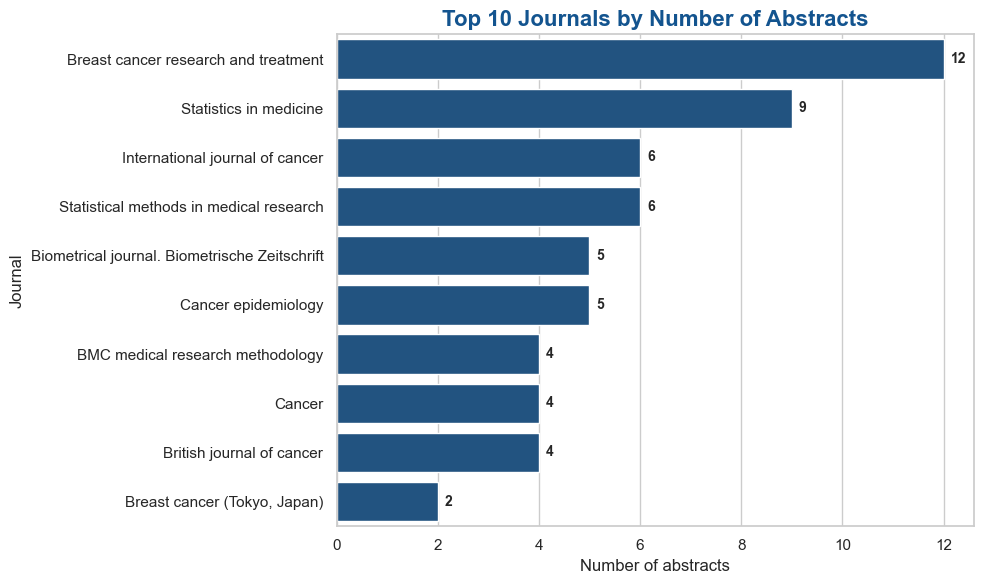

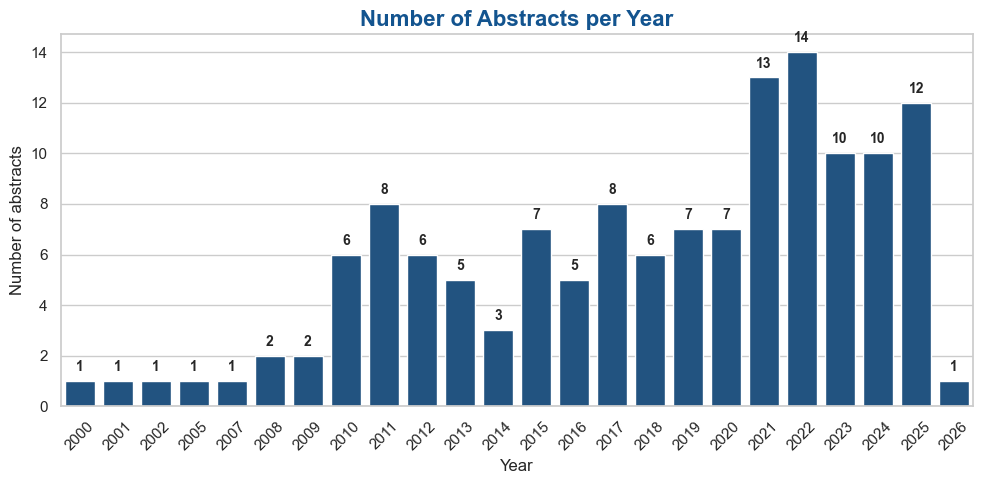

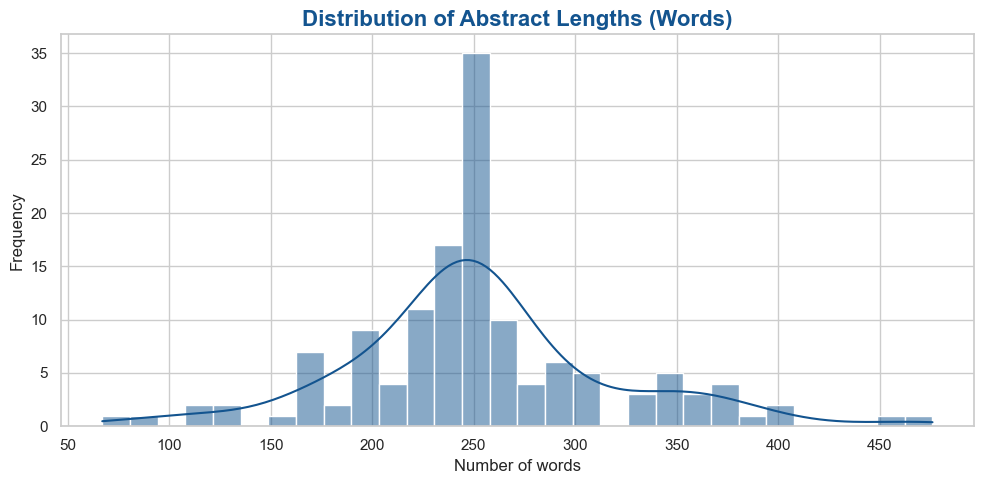

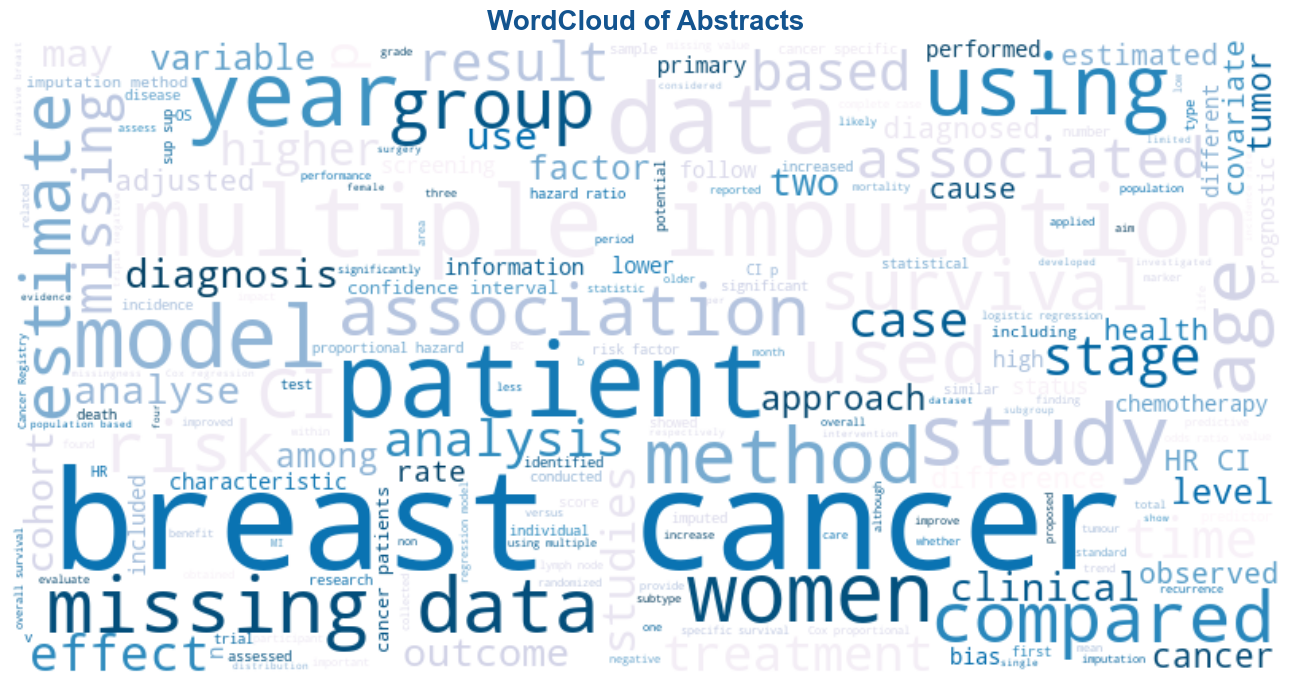

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

sns.set_theme(style="whitegrid")
BLUE_COLOR = "#13548F"  # color consistente para títulos

# -------------------------
# LOAD DATA
# -------------------------
df = pd.read_csv("data/pubmed_abstracts.csv")

# -------------------------
# BASIC METRICS
# -------------------------
print(f"Number of abstracts: {len(df)}")
print(f"Years covered: {df['year'].min()} - {df['year'].max()}")
print("Top journals:")
print(df['journal'].value_counts().head(10))

# Add abstract length (number of words)
df['abstract_length'] = df['abstract'].apply(lambda x: len(str(x).split()))

print("\nAbstract length statistics:")
print(df['abstract_length'].describe())

# -------------------------
# VISUALIZATIONS
# -------------------------

# --- Top 10 journals ---
top_journals = df['journal'].value_counts().head(10)
top_journals = top_journals.sort_values(ascending=False)  # DESCENDING now

plt.figure(figsize=(10,6))

# Color sólido para evitar warnings
bars = sns.barplot(
    x=top_journals.values,
    y=top_journals.index,
    color=BLUE_COLOR  # solid color, no palette
)

# Numbers at the end of each bar
for bar in bars.patches:
    width = bar.get_width()
    bars.annotate(f'{int(width)}',
                  xy=(width, bar.get_y() + bar.get_height() / 2),
                  xytext=(5,0),
                  textcoords="offset points",
                  ha='left', va='center',
                  fontsize=10,
                  fontweight='bold')

plt.xlabel("Number of abstracts")
plt.ylabel("Journal")
plt.title("Top 10 Journals by Number of Abstracts",
          fontsize=16, fontweight='bold', color=BLUE_COLOR)
plt.tight_layout()
plt.show()

# --- Number of abstracts per year ---
year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))

# Solid color again to avoid warning
bars = sns.barplot(
    x=year_counts.index,
    y=year_counts.values,
    color=BLUE_COLOR
)

# Numbers on top
for bar in bars.patches:
    height = bar.get_height()
    bars.annotate(f'{int(height)}',
                  xy=(bar.get_x() + bar.get_width() / 2, height),
                  xytext=(0,5),
                  textcoords="offset points",
                  ha='center', va='bottom',
                  fontsize=10,
                  fontweight='bold')

plt.xticks(rotation=45)
plt.ylabel("Number of abstracts")
plt.xlabel("Year")
plt.title("Number of Abstracts per Year", fontsize=16, fontweight='bold', color=BLUE_COLOR)
plt.tight_layout()
plt.show()

# --- Abstract length distribution ---
plt.figure(figsize=(10,5))
sns.histplot(df['abstract_length'], bins=30, kde=True, color=BLUE_COLOR)
plt.title("Distribution of Abstract Lengths (Words)", fontsize=16, fontweight='bold', color=BLUE_COLOR)
plt.xlabel("Number of words")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# --- WordCloud ---
all_text = " ".join(df['abstract'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='PuBu').generate(all_text)

plt.figure(figsize=(15,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(
    "WordCloud of Abstracts",
    fontsize=20,
    fontweight='bold',
    color=BLUE_COLOR
)
plt.tight_layout()
plt.show()


In [31]:
def latest_paper_summary(df):
    df_sorted = df.sort_values(by='year', ascending=False)
    latest = df_sorted.iloc[0]

    title = latest['title']
    abstract = latest['abstract']
    pmid = latest['pmid']
    link = f"https://pubmed.ncbi.nlm.nih.gov/{pmid}/"

    # Mostrar título y link
    print(f"Most recent paper ({latest['year']}):\n{title}")
    print(f"Link: {link}\n")

    # Mini resumen: primeros 3-4 frases del abstract
    sentences = str(abstract).split('. ')
    summary = '. '.join(sentences[:3]) + '.' if len(sentences) >= 3 else abstract
    print("Summary (first 3 sentences):")
    print(summary)

# -------------------------
# CALL THE FUNCTION
# -------------------------
latest_paper_summary(df)

Most recent paper (2026):
Breast cancer survival by stage at diagnosis in countries in transition: A population-based study.
Link: https://pubmed.ncbi.nlm.nih.gov/41590124/

Summary (first 3 sentences):
This study explores variation in stage-specific survival in women diagnosed with breast cancer in transitioning countries. We obtained data of women diagnosed between 2008 and 2012 from 11 population-based cancer registries (PBCRs) in 10 countries, with follow-up until December 2014. Following stage data standardization and multiple imputation for missing data, we estimated age-standardized 1-, 3-, and 5-year net survival (ASNS) by stage and age group.
